In [1]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=9d5662cec474fbffd2d486428f0f2d5fdf5c161c6e46f55f91cdbe4acd3ac55e
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [2]:
!mkdir data1
!cd data1
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pineapple.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/blackberry.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/blueberry.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/peanut.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pear.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/peas.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pizza.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sandwich.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/steak.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/watermelon.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/broccoli.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/carrot.npy

--2023-11-30 20:31:44--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113462128 (108M) [application/octet-stream]
Saving to: ‘apple.npy’

apple.npy           100%[===================>] 108.21M  19.6MB/s    in 6.1s    

2023-11-30 20:31:51 (17.7 MB/s) - ‘apple.npy’ saved [113462128/113462128]

--2023-11-30 20:31:51--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pineapple.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98055744 (94M) [application/octet-stream

Convolutional NeuralNet


In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import np_utils
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Function to load and preprocess the data
def load_data(files, directory='/content/'):
    data = []
    labels = []
    # Load the data
    for idx, file in enumerate(files):
        file_path = directory + file
        doodles = np.load(file_path)
        # Here we might want to limit the number of doodles per class to avoid class imbalance
        doodles = doodles[:10000]  # Assuming we are using 10,000 samples per class
        data.append(doodles)
        labels.extend([idx] * len(doodles))
    # Flatten the data and convert to float32 for precision
    data = np.concatenate(data).astype('float32')
    # Normalize the data
    data /= 255.0
    # Reshape for CNN input
    data = data.reshape(-1, 28, 28, 1)
    return data, np.array(labels)

# Define the model architecture
def create_model(num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Now adjust your main code to load the data
files = ['apple.npy', 'banana.npy', 'grapes.npy', 'pineapple.npy', 'peanut.npy',
         'pizza.npy', 'sandwich.npy', 'steak.npy', 'watermelon.npy', 'broccoli.npy', 'carrot.npy']
#files = ['apple.npy', 'banana.npy', 'grapes.npy', 'pineapple.npy','blackberry.npy', 'blueberry.npy', 'peanut.npy',
#         'pear.npy', 'peas.npy','pizza.npy', 'sandwich.npy', 'steak.npy', 'watermelon.npy', 'broccoli.npy', 'carrot.npy']
#files = ['apple.npy', 'banana.npy', 'grapes.npy', 'pineapple.npy']
data, labels = load_data(files)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.05)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=len(files))
y_test = to_categorical(y_test, num_classes=len(files))

# Create and compile the model
model = create_model(num_classes=len(files))

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Function to make predictions on new data
def predict_doodle(model, image):
    # Preprocess the image (assuming it's already a numpy array)
    image = image.reshape(1, 28, 28, 1)
    image = image.astype('float32')
    image /= 255
    # Predict the class
    prediction = model.predict(image)
    return np.argmax(prediction), np.max(prediction)

# Example of using the predict_doodle function
# new_doodle = ... # This should be a numpy array representing your new doodle image
# predicted_class, confidence = predict_doodle(model, new_doodle)
# print(f'Predicted class: {predicted_class} with confidence {confidence}')

Epoch 1/10
3266/3266 [==============================] - 111s 34ms/step - loss: 0.7743 - accuracy: 0.7540 - val_loss: 0.4371 - val_accuracy: 0.8616
Epoch 2/10
3266/3266 [==============================] - 102s 31ms/step - loss: 0.5253 - accuracy: 0.8367 - val_loss: 0.3665 - val_accuracy: 0.8845
Epoch 3/10
3266/3266 [==============================] - 100s 31ms/step - loss: 0.4563 - accuracy: 0.8567 - val_loss: 0.3356 - val_accuracy: 0.8918
Epoch 4/10
3266/3266 [==============================] - 101s 31ms/step - loss: 0.4227 - accuracy: 0.8676 - val_loss: 0.3332 - val_accuracy: 0.8940
Epoch 5/10
3266/3266 [==============================] - 101s 31ms/step - loss: 0.3956 - accuracy: 0.8756 - val_loss: 0.3121 - val_accuracy: 0.9016
Epoch 6/10
3266/3266 [==============================] - 101s 31ms/step - loss: 0.3751 - accuracy: 0.8813 - val_loss: 0.3050 - val_accuracy: 0.9067
Epoch 7/10
3266/3266 [==============================] - 101s 31ms/step - loss: 0.3650 - accuracy: 0.8849 - val_loss: 0

Artificial Neural Network


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

files = ['apple.npy', 'banana.npy', 'grapes.npy', 'pineapple.npy', 'peanut.npy',
         'pizza.npy', 'sandwich.npy', 'steak.npy', 'watermelon.npy', 'broccoli.npy', 'carrot.npy']
#files = ['apple.npy', 'banana.npy', 'grapes.npy', 'pineapple.npy','blackberry.npy', 'blueberry.npy', 'peanut.npy',
#         'pear.npy', 'peas.npy','pizza.npy', 'sandwich.npy', 'steak.npy', 'watermelon.npy', 'broccoli.npy', 'carrot.npy']
#files = ['apple.npy', 'banana.npy', 'grapes.npy', 'pineapple.npy']
data, labels = load_data(files)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.05)

# Flatten the images for ANN input
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Convert class vectors to binary class matrices (one-hot encoding)
y_train_cat = to_categorical(y_train, num_classes = len(files))
y_test_cat = to_categorical(y_test, num_classes = len(files))

# Create a simple ANN model
def create_ann_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and compile the ANN model
ann_model = create_ann_model((x_train_flat.shape[1],), len(files))

# Train the model
ann_model.fit(x_train_flat, y_train_cat, batch_size=32, epochs=10, validation_data=(x_test_flat, y_test_cat))

# Evaluate the model
score = ann_model.evaluate(x_test_flat, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
119/119 [==============================] - 2s 13ms/step - loss: 0.5481 - accuracy: 0.8016 - val_loss: 0.3369 - val_accuracy: 0.8800
Epoch 2/10
119/119 [==============================] - 1s 12ms/step - loss: 0.3253 - accuracy: 0.8929 - val_loss: 0.3428 - val_accuracy: 0.8900
Epoch 3/10
119/119 [==============================] - 1s 11ms/step - loss: 0.2758 - accuracy: 0.9066 - val_loss: 0.3289 - val_accuracy: 0.8750
Epoch 4/10
119/119 [==============================] - 1s 11ms/step - loss: 0.2189 - accuracy: 0.9268 - val_loss: 0.3212 - val_accuracy: 0.9000
Epoch 5/10
119/119 [==============================] - 1s 11ms/step - loss: 0.1901 - accuracy: 0.9345 - val_loss: 0.3233 - val_accuracy: 0.9050
Epoch 6/10
119/119 [==============================] - 1s 11ms/step - loss: 0.1776 - accuracy: 0.9405 - val_loss: 0.3758 - val_accuracy: 0.8750
Epoch 7/10
119/119 [==============================] - 1s 11ms/step - loss: 0.1447 - accuracy: 0.9503 - val_loss: 0.4558 - val_accuracy: 0.8800

RNN


In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np
from sklearn.model_selection import train_test_split

files = ['apple.npy', 'banana.npy', 'grapes.npy', 'pineapple.npy', 'peanut.npy',
         'pizza.npy', 'sandwich.npy', 'steak.npy', 'watermelon.npy', 'broccoli.npy', 'carrot.npy']
#files = ['apple.npy', 'banana.npy', 'grapes.npy', 'pineapple.npy','blackberry.npy', 'blueberry.npy', 'peanut.npy',
#         'pear.npy', 'peas.npy','pizza.npy', 'sandwich.npy', 'steak.npy', 'watermelon.npy', 'broccoli.npy', 'carrot.npy']
#files = ['apple.npy', 'banana.npy', 'grapes.npy', 'pineapple.npy']
data, labels = load_data(files)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.05)

# Reshape data for RNN
x_train_rnn = x_train.reshape(x_train.shape[0], x_train.shape[1], -1)  # Reshaping to (samples, time steps, features)
x_test_rnn = x_test.reshape(x_test.shape[0], x_test.shape[1], -1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=len(files))
y_test_cat = to_categorical(y_test, num_classes=len(files))

# Define RNN model
def create_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and compile the RNN model
rnn_model = create_rnn_model(x_train_rnn.shape[1:], len(files))

# Train the model
rnn_model.fit(x_train_rnn, y_train_cat, batch_size=32, epochs=10, validation_data=(x_test_rnn, y_test_cat))

# Evaluate the model
score = rnn_model.evaluate(x_test_rnn, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
119/119 [==============================] - 17s 110ms/step - loss: 0.5767 - accuracy: 0.7808 - val_loss: 0.3993 - val_accuracy: 0.8650
Epoch 2/10
119/119 [==============================] - 13s 112ms/step - loss: 0.3413 - accuracy: 0.8824 - val_loss: 0.2932 - val_accuracy: 0.9100
Epoch 3/10
119/119 [==============================] - 10s 87ms/step - loss: 0.2661 - accuracy: 0.9084 - val_loss: 0.3351 - val_accuracy: 0.9150
Epoch 4/10
119/119 [==============================] - 12s 98ms/step - loss: 0.2425 - accuracy: 0.9163 - val_loss: 0.3425 - val_accuracy: 0.8800
Epoch 5/10
119/119 [==============================] - 12s 103ms/step - loss: 0.2296 - accuracy: 0.9205 - val_loss: 0.3297 - val_accuracy: 0.9100
Epoch 6/10
119/119 [==============================] - 16s 137ms/step - loss: 0.2126 - accuracy: 0.9318 - val_loss: 0.3475 - val_accuracy: 0.8950
Epoch 7/10
119/119 [==============================] - 12s 105ms/step - loss: 0.1997 - accuracy: 0.9287 - val_loss: 0.3564 - val_accu

Testing image by image with random images from the dataset



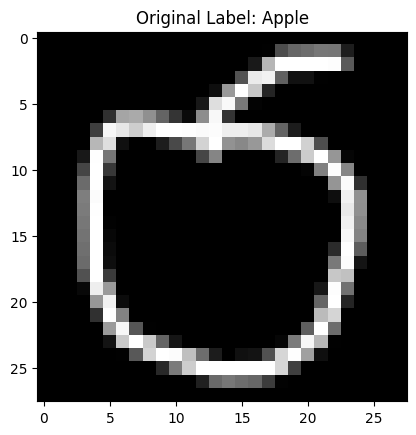

1/1 [==============================] - 1s 959ms/step
CNN Prediction: Class - Apple, Confidence - 1.00
ANN Prediction: Class - Apple, Confidence - 1.00
RNN Prediction: Class - Apple, Confidence - 1.00


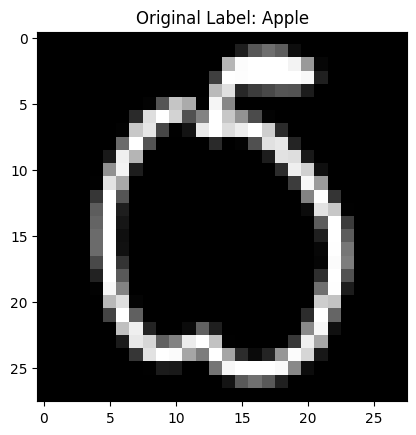

1/1 [==============================] - 0s 25ms/step
CNN Prediction: Class - Apple, Confidence - 1.00
ANN Prediction: Class - Apple, Confidence - 1.00
RNN Prediction: Class - Apple, Confidence - 1.00


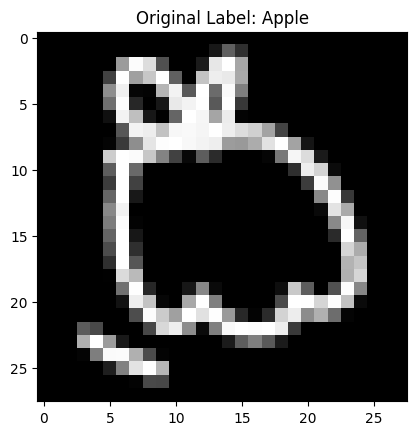

1/1 [==============================] - 0s 30ms/step
CNN Prediction: Class - Apple, Confidence - 0.79
ANN Prediction: Class - Banana, Confidence - 0.41
RNN Prediction: Class - Pineapple, Confidence - 0.39


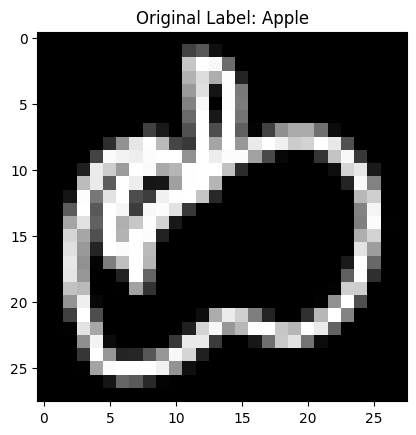

1/1 [==============================] - 0s 29ms/step


KeyError: ignored

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Load your trained model (make sure to replace 'your_model.h5' with the actual path to your model)

# Define the labels and the corresponding files
labels_dict = {0: 'Apple', 1: 'Banana', 2: 'Grapes', 3: 'Pineapple'}
files = ['apple.npy', 'banana.npy', 'grapes.npy', 'pineapple.npy']
directory = '/content/'

# Function to load one random image from each class
def load_random_images(files, directory):
    images = []
    for file in files:
        file_path = os.path.join(directory, file)
        class_data = np.load(file_path)
        # Randomly select one image
        for i in range(0,25):
          random_idx = np.random.choice(class_data.shape[0])
          images.append((class_data[random_idx], file))
    return images

# Function to predict the class of an image
def predict_image(cnn_model, ann_model, rnn_model, image, labels_dict):
    # Preprocess the image for the CNN model
    image_cnn = image.astype('float32') / 255.0
    image_cnn = image_cnn.reshape(1, 28, 28, 1)

    # Predict with the CNN model
    pred_cnn = cnn_model.predict(image_cnn)
    predicted_class_cnn = np.argmax(pred_cnn)
    confidence_cnn = np.max(pred_cnn)

    # Preprocess the image for the ANN model
    image_ann = image.flatten().reshape(1, -1) / 255.0

    # Predict with the ANN model
    pred_ann = ann_model.predict(image_ann)
    predicted_class_ann = np.argmax(pred_ann)
    confidence_ann = np.max(pred_ann)

    # Preprocess the image for the RNN model
    image_rnn = image.reshape(1, 28, -1) / 255.0

    # Predict with the RNN model
    pred_rnn = rnn_model.predict(image_rnn)
    predicted_class_rnn = np.argmax(pred_rnn)
    confidence_rnn = np.max(pred_rnn)

    return {
        'CNN': (labels_dict[predicted_class_cnn], confidence_cnn),
        'ANN': (labels_dict[predicted_class_ann], confidence_ann),
        'RNN': (labels_dict[predicted_class_rnn], confidence_rnn)
    }

# Load one random image from each class
random_images = load_random_images(files, directory)

# Display the images and predict
for image, filename in random_images:
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Original Label: {labels_dict[files.index(filename)]}")
    plt.show()

    # Make a prediction
    results = predict_image(model, ann_model, rnn_model, image, labels_dict)

    # Print results
    for model_name, result in results.items():
      print(f"{model_name} Prediction: Class - {result[0]}, Confidence - {result[1]:.2f}")

Total Accuracy

In [ ]:
def calculate_accuracy(cnn_model, ann_model, rnn_model, x_test, y_test, labels_dict):
    # Initialize counters for correct predictions
    correct_predictions = {'CNN': 0, 'ANN': 0, 'RNN': 0}
    total_predictions = len(x_test)

    # Iterate over the test dataset
    for i in range(total_predictions):
        # Prepare the image for each model
        image_cnn = x_test[i].reshape(1, 28, 28, 1) / 255.0
        image_ann = x_test[i].flatten().reshape(1, -1) / 255.0
        image_rnn = x_test[i].reshape(1, 28, -1) / 255.0

        # Make predictions
        pred_cnn = cnn_model.predict(image_cnn)
        pred_ann = ann_model.predict(image_ann)
        pred_rnn = rnn_model.predict(image_rnn)

        # Determine the predicted class
        predicted_class_cnn = np.argmax(pred_cnn)
        predicted_class_ann = np.argmax(pred_ann)
        predicted_class_rnn = np.argmax(pred_rnn)

        # Check if predictions are correct
        actual_class = np.argmax(y_test[i])
        if predicted_class_cnn == actual_class:
            correct_predictions['CNN'] += 1
        if predicted_class_ann == actual_class:
            correct_predictions['ANN'] += 1
        if predicted_class_rnn == actual_class:
            correct_predictions['RNN'] += 1

    # Calculate accuracy for each model
    accuracies = {model: correct / total_predictions for model, correct in correct_predictions.items()}
    return accuracies

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.05)

# Reshape data for RNN
x_train_rnn = x_train.reshape(x_train.shape[0], x_train.shape[1], -1)  # Reshaping to (samples, time steps, features)
x_test_rnn = x_test.reshape(x_test.shape[0], x_test.shape[1], -1)

# Example usage:
y_test_cat = to_categorical(y_test, num_classes=len(files))  # Assuming y_test is available
accuracies = calculate_accuracy(model, ann_model, rnn_model, x_test, y_test_cat, labels_dict)

# Print accuracies
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.2%}")

1/1 [==============================] - 0s 31ms/step
CNN Accuracy: 24.50%
ANN Accuracy: 24.50%
RNN Accuracy: 24.50%
